# Руководство по визуализации данных в машинном обучении с использованием библиотеки Yellowbrick

[https://www.scikit-yb.org/en/latest/](https://www.scikit-yb.org/en/latest/)

## Матрица ошибок

Матрица ошибок  —  это простой способ визуально оценить, насколько часто предсказания классификатора оказываются верными.

Используем набор данных “диабет”. Он состоит из ряда характеристик пациентов, таких как индекс массы тела, измерения сывороточного инсулина с 2-часовым интервалом и возраст, а также столбца, указывающего результат теста на диабет у пациента (положительный или отрицательный). Цель исследования  —  использовать эти данные для построения модели, которая может предсказать положительный результат анализа на диабет.

In [3]:
# импортируем набор данных через API Scikit-learn
from sklearn.datasets import fetch_openml
X, y = fetch_openml(name='diabetes', return_X_y=True)

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:421: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]["version"])


В бинарной классификации возможны четыре потенциальных исхода для прогноза, который делает модель.

**Истинно положительный**. Модель верно предсказала положительный результат, например результат теста на диабет был положительным, и прогноз модели оказался положительным.

**Ложноположительный**. Модель неверно предсказала положительный результат, например результат теста на диабет был отрицательным, но прогноз модели оказался положительным.

**Истинно отрицательный**. Модель верно предсказала отрицательный результат, например результат теста на диабет был отрицательным, и прогноз модели оказался отрицательным.

**Ложноотрицательный**. Модель неверно предсказала отрицательный результат, например результат теста на диабет был положительным, а прогноз модели оказался отрицательным.

Матрица ошибок визуализирует подсчет каждого из возможных исходов в виде сетки. Приведенный ниже код использует визуализатор *Yellowbrick ConfusionMatrix* для создания матрицы ошибок для модели:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


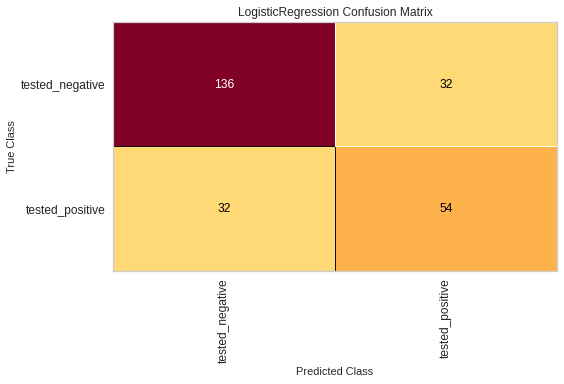

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression()

cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

## ROC-кривые

Первоначальный результат классификатора  —  это не метка, а вероятность того, что конкретное наблюдение принадлежит к определенному классу.

Затем эта вероятность превращается в класс путем выбора порога. Например, если вероятность положительного теста пациента выше 0,5, то присваивается положительная метка.

В зависимости от модели, данных и случая использования, можно выбрать порог, чтобы оптимизировать конкретный результат. В примере с диабетом пропуск положительного результата опасен для жизни, поэтому нужно свести к минимуму количество ложноотрицательных результатов. Изменение порога для классификатора  —  один из способов оптимизации этого результата, а ROC-кривая  —  один из способов визуализации этого компромисса.

Приведенный ниже код использует Yellowbrick для построения ROC-кривой:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


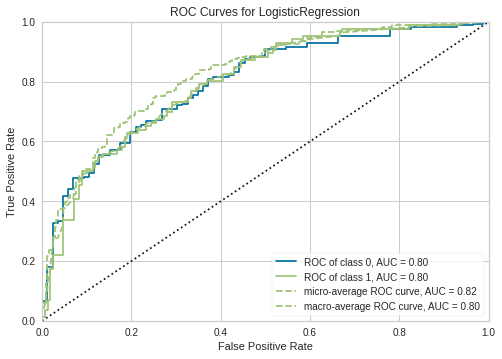

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression()

visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)      
visualizer.show()

ROC-кривая показывает соотношение истинно положительных результатов и ложноположительных. С ее помощью можно оценить влияние понижения или повышения порога классификации.

## Кривая “точность-полнота”

ROC-кривые не всегда являются оптимальным способом оценки классификатора. Если классы не сбалансированы (один класс имеет гораздо больше наблюдений по сравнению с другим), результаты ROC-кривой могут ввести в заблуждение.

Кривая “точность-полнота” часто является идеальным выбором в таких ситуациях.

Вспомним, что подразумевается под терминами “точность” (precision) и “полнота” (recall).

Точность дает представление о том, насколько хорошо модель правильно определяет положительный класс. Другими словами, сколько из всех предсказаний для положительного класса были правильными.
Полнота позволяет судить о том, насколько хорошо модель правильно предсказывает все положительные наблюдения в наборе данных.
Обычно достигается компромисс между точностью и полнотой. Например, можно увеличить точность за счет уменьшения полноты.

Кривая “точность-полнота” отражает этот компромисс при различных порогах классификации.

Приведенный ниже код использует библиотеку Yellowbrick для построения кривой “точность-полнота” для классификатора диабета:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


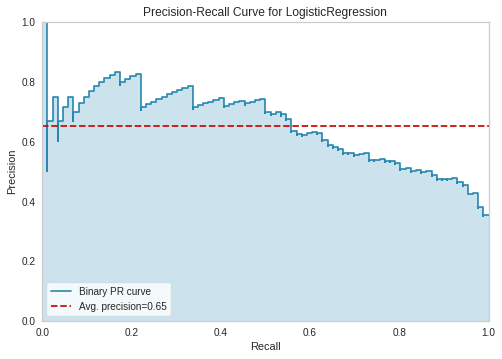

In [6]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(LogisticRegression(random_state=42))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## Межкластерное расстояние

Библиотека Yellowbrick также содержит набор инструментов визуализации для анализа алгоритмов кластеризации. Распространенным способом оценки эффективности моделей кластеризации является карта межкластерных расстояний.

Карта межкластерных расстояний показывает встраивание центра каждого кластера и визуализирует как расстояние между кластерами, так и относительный размер каждого кластера в зависимости от его принадлежности.

Можно превратить набор данных о диабете в задачу кластеризации, используя только признаки (X).

Прежде чем кластеризовать данные, можно использовать популярный метод локтя (elbow method) для поиска оптимального количества кластеров. В Yellowbrick есть метод для этого.

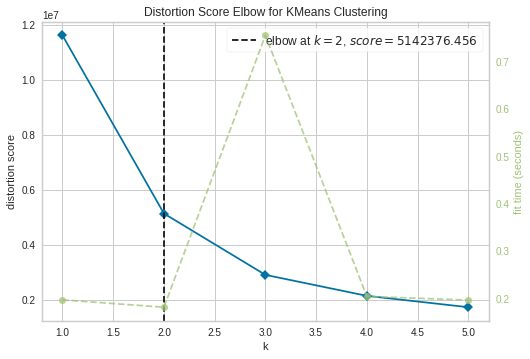

In [7]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,6))
visualizer.fit(X)  
visualizer.show()

Кривая локтя показывает, что оптимальными являются два кластера.

Теперь построим карту межкластерных расстояний для набора данных, выбрав два кластера:

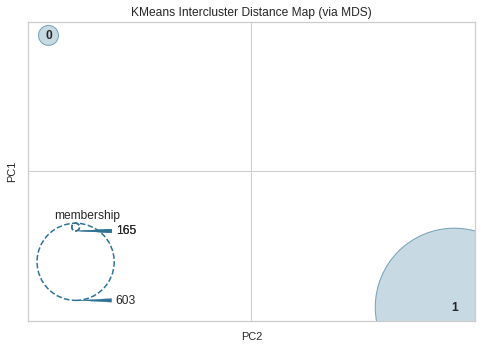

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance

model = KMeans(2)

visualizer = InterclusterDistance(model)
visualizer.fit(X)
visualizer.show()

Как видите, между двумя кластерами существует значительное разделение. Принадлежность предполагает, что в одном кластере 165 наблюдений, а в другом  —  603. Это довольно близко по значениям к балансу двух классов в наборе данных по диабету (268 и 500 наблюдений по каждому классу).

## График остатков

Модели машинного обучения на основе регрессии имеют собственный набор визуализаций. Yellowbrick также обеспечивает их поддержку.

Чтобы проиллюстрировать визуализации для задач регрессии, воспользуемся вариацией набора данных по диабету, который можно получить через API Scikit-learn. Этот набор данных имеет схожие характеристики с тем, что использовался ранее, но целью визуализации теперь является количественная мера прогрессирования заболевания через год после исходного уровня.

In [9]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

В регрессии визуализация остатков является одним из методов анализа эффективности модели. Остатки  —  разница между наблюдаемым значением и значением, предсказанным моделью. Это один из способов количественной оценки ошибки в регрессионной модели.

Приведенный ниже код выводит график остатков для простой регрессионной модели:

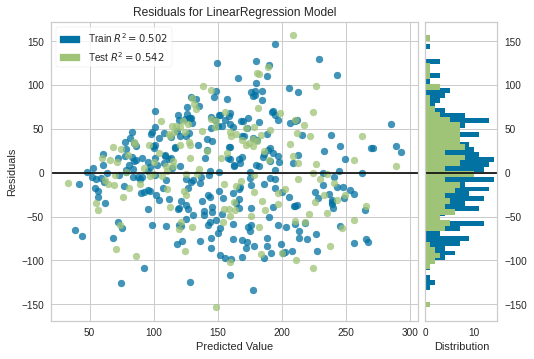

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import residuals_plot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

model = LinearRegression()

viz = residuals_plot(model, X_train, y_train, X_test, y_test)

В библиотеке Yellowbrick доступны и другие визуализации для моделей на основе регрессии:

* график погрешности прогнозирования;
* альфа-отбор;
* расстояние Кука.
Библиотека Yellowbrick Python предлагает быстрый способ создания визуализаций для моделей машинного обучения, разработанных с помощью Scikit-learn. В дополнение к визуализациям для оценки эффективности модели Yellowbrick предоставляет инструменты для визуализации перекрестной валидации, построения кривых обучения и определения важности признаков. Кроме того, эта библиотека обладает функционалом для визуализации текстового моделирования.